In [15]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

import matplotlib.pyplot as plt
from pandas.plotting import table

### Extract the crowdfunding.xlsx Data

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [4]:
# Get the crowdfunding_info_df columns.
crowdfunding_info_df.columns

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

In [5]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category', 'subcategory']] = crowdfunding_info_df['category & sub-category'].str.split('/', n=2, expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [6]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_info_df['category'].unique()
subcategories = crowdfunding_info_df['subcategory'].unique()

print(categories)
print(subcategories)

['food' 'music' 'technology' 'theater' 'film & video' 'publishing' 'games'
 'photography' 'journalism']
['food trucks' 'rock' 'web' 'plays' 'documentary' 'electric music' 'drama'
 'indie rock' 'wearables' 'nonfiction' 'animation' 'video games' 'shorts'
 'fiction' 'photography books' 'radio & podcasts' 'metal' 'jazz'
 'translations' 'television' 'mobile games' 'world music'
 'science fiction' 'audio']


In [7]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [8]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = [f"cat{category_id}" for category_id in category_ids]

# Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids = [f"subcat{subcategory_id}" for subcategory_id in subcategory_ids]
    
print(cat_ids)
print(scat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [10]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_dict = {'category_id' : cat_ids , 'category' : categories}
category_df = pd.DataFrame(category_dict)
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_dict = {'subcategory_id' : scat_ids , 'subcategory' : subcategories}
subcategory_df = pd.DataFrame(subcategory_dict)

In [11]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


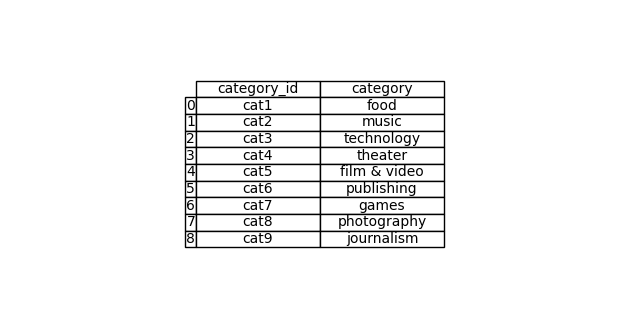

In [19]:
# Plotting the category_df DataFrame
fig, ax = plt.subplots(figsize=(8, 4)) 

ax.axis('off')
tbl = table(ax, category_df, loc='center', cellLoc = 'center', colWidths = [.2]*len(category_df.columns))

# Adjust font size of the table cells
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

In [20]:
# Export as image
output_path = 'Data_Images/category_df.png' 
fig.savefig(output_path, bbox_inches='tight', pad_inches=0.1)

In [12]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [13]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [14]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [15]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df.rename(columns={'blurb':"decription", 'launched_at':"launched_date", 'deadline':"end_date"}, inplace=True)
campaign_df.head()

,cf_id,contact_id,company_name,decription,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [16]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df[["goal", "pledged"]] = campaign_df[["goal", "pledged"]].astype(float)
campaign_df.head()

,cf_id,contact_id,company_name,decription,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [17]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
decription                  object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launched_date                int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [18]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
campaign_df["launched_date"]  = pd.to_datetime(campaign_df["launched_date"])
campaign_df["end_date"]  = pd.to_datetime(campaign_df["end_date"])
campaign_df.head()

,cf_id,contact_id,company_name,decription,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1970-01-01 00:00:01.608184800,1970-01-01 00:00:01.640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1970-01-01 00:00:01.634792400,1970-01-01 00:00:01.642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1970-01-01 00:00:01.608530400,1970-01-01 00:00:01.629694800,False,False,theater/plays,theater,plays


In [19]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cf_id                    1000 non-null   int64         
 1   contact_id               1000 non-null   int64         
 2   company_name             1000 non-null   object        
 3   decription               1000 non-null   object        
 4   goal                     1000 non-null   float64       
 5   pledged                  1000 non-null   float64       
 6   outcome                  1000 non-null   object        
 7   backers_count            1000 non-null   int64         
 8   country                  1000 non-null   object        
 9   currency                 1000 non-null   object        
 10  launched_date            1000 non-null   datetime64[ns]
 11  end_date                 1000 non-null   datetime64[ns]
 12  staff_pick               1000 non-n

In [20]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
campaign_merged_df=pd.merge(campaign_df, category_df, on='category')
campaign_merged_df=pd.merge(campaign_merged_df, subcategory_df, on='subcategory')
campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,decription,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,399,5983,"Dixon, Perez and Banks",Re-engineered encompassing definition,8300.0,2111.0,failed,57,CA,CAD,1970-01-01 00:00:01.640757600,1970-01-01 00:00:01.642312800,False,False,photography/photography books,photography,photography books,cat8,subcat15
991,1378,2873,Clements Ltd,Persistent bandwidth-monitored framework,3700.0,1343.0,failed,52,US,USD,1970-01-01 00:00:01.594098000,1970-01-01 00:00:01.627362000,False,False,photography/photography books,photography,photography books,cat8,subcat15
992,806,2961,Walter Inc,Streamlined 5thgeneration intranet,10000.0,8142.0,failed,263,AU,AUD,1970-01-01 00:00:01.608444000,1970-01-01 00:00:01.612072800,False,False,photography/photography books,photography,photography books,cat8,subcat15
993,1563,3043,"Sanders, Farley and Huffman",Cross-group clear-thinking task-force,172000.0,55805.0,failed,1691,US,USD,1970-01-01 00:00:01.617858000,1970-01-01 00:00:01.639807200,True,False,photography/photography books,photography,photography books,cat8,subcat15
994,1951,6013,Rodriguez-Robinson,Ergonomic methodical hub,5900.0,4997.0,failed,114,IT,EUR,1970-01-01 00:00:01.627016400,1970-01-01 00:00:01.637820000,False,True,photography/photography books,photography,photography books,cat8,subcat15
995,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,1970-01-01 00:00:01.625288400,1970-01-01 00:00:01.625720400,False,True,photography/photography books,photography,photography books,cat8,subcat15
996,1095,3565,Young and Sons,Innovative disintermediate encryption,2400.0,4596.0,successful,144,US,USD,1970-01-01 00:00:01.606543200,1970-01-01 00:00:01.614492000,False,False,journalism/audio,journalism,audio,cat9,subcat24
997,1388,4517,Valenzuela-Cook,Total incremental productivity,6700.0,7496.0,successful,300,US,USD,1970-01-01 00:00:01.609740000,1970-01-01 00:00:01.633323600,False,False,journalism/audio,journalism,audio,cat9,subcat24
998,2448,2389,Little Ltd,Decentralized bandwidth-monitored ability,6900.0,12155.0,successful,419,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.618722000,False,False,journalism/audio,journalism,audio,cat9,subcat24
999,602,2153,Giles-Smith,Right-sized web-enabled intranet,9700.0,11929.0,successful,331,US,USD,1970-01-01 00:00:01.643695200,1970-01-01 00:00:01.644991200,False,False,journalism/audio,journalism,audio,cat9,subcat24


In [21]:
# Drop unwanted columns
campaign_cleaned = campaign_merged_df.drop(['staff_pick', 'spotlight', 'category & sub-category', 'category', 'subcategory'], axis=1)
campaign_cleaned.head()

,cf_id,contact_id,company_name,decription,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,1970-01-01 00:00:01.592629200,1970-01-01 00:00:01.611986400,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,1970-01-01 00:00:01.606629600,1970-01-01 00:00:01.623387600,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process improvement,142400.0,21307.0,failed,296,US,USD,1970-01-01 00:00:01.588654800,1970-01-01 00:00:01.622350800,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,1970-01-01 00:00:01.611900000,1970-01-01 00:00:01.613196000,cat1,subcat1


In [22]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [23]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [24]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json
    
# 1. Create two list one for the keys and one for the values.
dict_values = []
column_names = []
#  2. Iterate through the DataFrame.
for i, row in contact_info_df.iterrows():
    data = row[0]
    # Convert each row to a Python dictionary.
    converted_data = json.loads(data)
    # Use a list comprehension to get the keys from the converted data.
    columns = [k for k,v in converted_data.items()]
    # Use a list comprehension to get the values for each row.
    row_values = [v for k, v in converted_data.items()]
    # Append the keys and list values to the lists created in step 1.  
    column_names.append(columns)
    dict_values.append(row_values)

# Print out the keys and list of values for each row.
print(column_names[0])
print()
print(dict_values)

['contact_id', 'name', 'email']

[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com'], [5650, 'Socorro Luna', 'socorro.luna@hotmail.com'], [5889, 'Carolina Murray', 'carolina.murray@knight.com'], [4842, 'Kayla Moon', 'kayla.moon@yahoo.de'], [3280, 'Ariadna Geisel', 'ariadna.geisel@rangel.com'], [5468, 'Danielle Ladeck', 'danielle.ladeck@scalfaro.net'], [3064, 'Tatiana Thompson', 'tatiana.thompson@hunt.net'], [4904, 'Caleb Benavides', 'caleb.benavides@rubio.com'], [1299, 'Sandra Hardy', 'sandra.hardy@web.de'], [5602, 'Lotti Morris', 'lotti.morris@yahoo.co.uk'], [5753, 'Reinhilde White', 'reinhilde.white@voila.fr'], [4495, 'Kerry Patel', 'kerry.patel@hutchinson.com'], [4269, 'Sophie Antoine', 'sophie.antoine@andersen.com'], [2226, 'Martha Girard', 'martha.girard@web.de'

In [25]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
contact_df = pd.DataFrame(dict_values, columns=column_names[0])
contact_df.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [26]:
# Check the datatypes.
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   name        1000 non-null   object
 2   email       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [27]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contact_df['first_name'] = contact_df['name'].str.split().str[0]
contact_df['last_name'] = contact_df['name'].str.split().str[-1]
# Drop the contact_name column
contact_df.drop('name', axis=1, inplace=True)
contact_df.head()

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [28]:
# Reorder the columns
contact_df = contact_df [['contact_id','first_name','last_name','email']]
contact_df.head(10)

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com
5,5650,Socorro,Luna,socorro.luna@hotmail.com
6,5889,Carolina,Murray,carolina.murray@knight.com
7,4842,Kayla,Moon,kayla.moon@yahoo.de
8,3280,Ariadna,Geisel,ariadna.geisel@rangel.com
9,5468,Danielle,Ladeck,danielle.ladeck@scalfaro.net


In [29]:
# Check the datatypes one more time before exporting as CSV file.
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [30]:
# Export the DataFrame as a CSV file. 
contact_df.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [31]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [32]:
# Extract the four-digit contact ID number.
contact_info_df_copy['contact_id'] = contact_info_df_copy['contact_info'].str.extract(r'contact_id": (\d{4})')
contact_info_df_copy

,contact_info,contact_id
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199
...,...,...
995,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684
996,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784
997,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498
998,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073


In [33]:
# Check the datatypes.
contact_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   contact_info  1000 non-null   object
 1   contact_id    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [34]:
# Convert the "contact_id" column to an int64 data type.
contact_info_df_copy['contact_id']=contact_info_df_copy['contact_id'].astype(int)
contact_info_df_copy['contact_id'].dtype

dtype('int64')

In [35]:
# Extract the name of the contact and add it to a new column.
contact_info_df_copy['name'] = contact_info_df_copy['contact_info'].str.extract(r'([^nameil"\s][A-Za-z]+\s+[A-Za-z]+)')
contact_info_df_copy.head(10)

,contact_info,contact_id,name
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz
5,"{""contact_id"": 5650, ""name"": ""Socorro Luna"", ""email"": ""socorro.luna@hotmail.com""}",5650,Socorro Luna
6,"{""contact_id"": 5889, ""name"": ""Carolina Murray"", ""email"": ""carolina.murray@knight.com""}",5889,Carolina Murray
7,"{""contact_id"": 4842, ""name"": ""Kayla Moon"", ""email"": ""kayla.moon@yahoo.de""}",4842,Kayla Moon
8,"{""contact_id"": 3280, ""name"": ""Ariadna Geisel"", ""email"": ""ariadna.geisel@rangel.com""}",3280,Ariadna Geisel
9,"{""contact_id"": 5468, ""name"": ""Danielle Ladeck"", ""email"": ""danielle.ladeck@scalfaro.net""}",5468,Danielle Ladeck


In [36]:
# Extract the email from the contacts and add the values to a new column.
contact_info_df_copy['email'] = contact_info_df_copy['contact_info'].str.extract(r'"(\S+@\S+)"}')
contact_info_df_copy.head(10)

,contact_info,contact_id,name,email
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis,mariana.ellis@rossi.org
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods,sofie.woods@riviere.com
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
5,"{""contact_id"": 5650, ""name"": ""Socorro Luna"", ""email"": ""socorro.luna@hotmail.com""}",5650,Socorro Luna,socorro.luna@hotmail.com
6,"{""contact_id"": 5889, ""name"": ""Carolina Murray"", ""email"": ""carolina.murray@knight.com""}",5889,Carolina Murray,carolina.murray@knight.com
7,"{""contact_id"": 4842, ""name"": ""Kayla Moon"", ""email"": ""kayla.moon@yahoo.de""}",4842,Kayla Moon,kayla.moon@yahoo.de
8,"{""contact_id"": 3280, ""name"": ""Ariadna Geisel"", ""email"": ""ariadna.geisel@rangel.com""}",3280,Ariadna Geisel,ariadna.geisel@rangel.com
9,"{""contact_id"": 5468, ""name"": ""Danielle Ladeck"", ""email"": ""danielle.ladeck@scalfaro.net""}",5468,Danielle Ladeck,danielle.ladeck@scalfaro.net


In [37]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
contact_info_copy2 = contact_info_df_copy[['contact_id', 'name', 'email']].copy()
contact_info_copy2.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [38]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contact_info_copy2[['first_name', 'last_name']] = contact_info_copy2['name'].str.split(' ', n=1, expand=True)

# Drop the contact_name column
contact_info_copy2 = contact_info_copy2.drop(["name"], axis = 1)
contact_info_copy2.head()

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [39]:
# Reorder the columns
contact_info_copy2 = contact_info_copy2[['contact_id', 'first_name', 'last_name', 'email']]
contact_info_copy2.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [40]:
# Check the datatypes one more time before exporting as CSV file.
contact_info_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [41]:
# Export the DataFrame as a CSV file. 
contact_info_copy2.to_csv("Resources/contacts.csv", encoding='utf8', index=False)